In [26]:
import pandas as pd
from collections import Counter
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
typhoon_news = pd.read_csv('./data/typhoon.csv')
cities = pd.read_csv('./data/sa340.csv')

In [28]:
len(typhoon_news)

5071

In [29]:
def get_city_info():
    df = cities[['name', 'center', 'en_name', 'pro_name']].copy()
    df[['longitude', 'latitude']] = df['center'].str.split(',', expand=True)
    df['longitude'] = df['longitude'].astype(float)
    df['latitude'] = df['latitude'].astype(float)

    df = df.drop(columns=['center'])
    return df

In [30]:
get_city_info()

,name,en_name,pro_name,longitude,latitude
0,唐山市,Tangshan,河北省,118.180149,39.630680
1,秦皇岛市,Qinhuangdao,河北省,119.520220,39.888243
2,承德市,Chengde,河北省,117.962749,40.952942
3,石家庄市,Shijiazhuang,河北省,114.514976,38.042007
4,廊坊市,Langfang,河北省,116.683546,39.538304
...,...,...,...,...,...
335,北京市,Beijing,北京市,116.407387,39.904179
336,天津市,Tianjin,天津市,117.201509,39.085318
337,上海市,Shanghai,上海市,121.473667,31.230525
338,重庆市,Chongqing,重庆市,106.550483,29.563707


# 1.台风新闻的地理分布

In [45]:
def get_dist_geo():
    count = Counter(typhoon_news['city_name'])
    df_count = pd.DataFrame(count.items(), columns=['name', 'count']).sort_values(by='count', ascending=False)
    cities = get_city_info()
    temp = pd.merge(df_count, cities, on='name')
    temp.to_csv('./QGIS/news_dist/news.dist.csv', index=None)
    return temp

dist_geo = get_dist_geo()
dist_geo[0:11]

,name,count,en_name,pro_name,longitude,latitude
0,汕头市,156,Shantou,广东省,116.681956,23.354152
1,揭阳市,134,Jieyang,广东省,116.372732,23.550968
2,茂名市,132,Maoming,广东省,110.925533,21.662728
3,潮州市,131,Chaozhou,广东省,116.621901,23.657662
4,江门市,128,Jiangmen,广东省,113.081548,22.578948
5,泉州市,120,Quanzhou,福建省,118.675724,24.874452
6,上海市,110,Shanghai,上海市,121.473667,31.230525
7,深圳市,108,Shenzhen,广东省,114.057939,22.543527
8,台州市,103,Taizhou,浙江省,121.420790,28.655716
9,海口市,99,Haikou,海南省,110.198418,20.045805


In [29]:
dist_geo_province = dist_geo.groupby('pro_name')['count'].sum().reset_index()
dist_geo_province = dist_geo_province.sort_values(by='count', ascending=False)
dist_geo_province

,pro_name,count
11,广东省,1631
17,浙江省,671
13,江苏省,339
23,福建省,278
15,河北省,240
14,江西省,213
4,吉林省,203
8,安徽省,178
29,黑龙江省,175
16,河南省,138


# 2.台风月份分布

In [59]:
def get_dist_month_typhoon():
    typhoon_list = pd.read_json('./data/typhoon_list4study.json')
    typhoon_list = typhoon_list[typhoon_list.EnglishName!='(nameless)']
    typhoon_list = typhoon_list.reset_index(drop=True)
    typhoon_list = typhoon_list.sort_values(by=['year', 'month'], ascending=True).reset_index(drop=True)
    typhoon_list['YearMonth'] = typhoon_list['year'].astype(str) + '-' + typhoon_list['month'].apply(lambda x: f"{x:02d}")
    
    return typhoon_list

In [60]:
get_dist_month_typhoon()

,ChineseName,EnglishName,month,year,YearMonth
0,榕树,BANYAN,10,2022,2022-10
1,尼格,NALGAE,10,2022,2022-10
2,海棠,HAITANG,10,2022,2022-10
3,纳沙,NESAT,10,2022,2022-10
4,桑卡,SONCA,10,2022,2022-10
5,山猫,YAMANEKO,11,2022,2022-11
6,帕卡,PAKHAR,12,2022,2022-12
7,珊瑚,SANVU,4,2023,2023-04
8,玛娃,MAWAR,5,2023,2023-05
9,古超,GUCHOL,6,2023,2023-06


In [61]:
def get_typhoon_news_num(name):
    temp = typhoon_news[typhoon_news['text'].str.contains(name, na=False)]
    return temp

In [64]:
def show_typhoon_news_num():
    typhoon_list = get_dist_month_typhoon()
    rows = []
    for i, r in typhoon_list.iterrows():
        cn_name = r['ChineseName']
        en_name = r['EnglishName']
        YearMonth = r['YearMonth']
        row = [cn_name, en_name, len(get_typhoon_news_num(cn_name))]
        rows.append(row)
    temp = pd.DataFrame(rows, columns=['ChineseName', 'EnglishName', 'num'])
    return temp

In [65]:
dist_month_news_count = show_typhoon_news_num()
dist_month_news_count.sort_values(by='num', ascending=False)

,ChineseName,EnglishName,num
11,杜苏芮,DOKSURI,1519
16,苏拉,SAOLA,774
10,卡努,KHANUN,647
14,海葵,HAIKUI,568
12,泰利,TALIM,404
19,小犬,KOINU,282
8,玛娃,MAWAR,122
1,尼格,NALGAE,109
18,兰恩,LAN,105
15,达维,DAMREY,102


# 3.新闻的月份分布

In [56]:
def get_dist_month():
    df = typhoon_news.copy()
    df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
    monthly_distribution = df.groupby('month').size()
    return monthly_distribution

get_dist_month()

month
2022-10     160
2022-11      64
2022-12       4
2023-01       8
2023-02      14
2023-03      26
2023-04      61
2023-05     215
2023-06      96
2023-07    1851
2023-08    1427
2023-09     882
2023-10     263
Freq: M, dtype: int64

# 4.预警信息

In [31]:
# https://tf.121.com.cn/web/wiki/typhoonSignal.html
def get_warning():
    warnings = ['蓝色预警', '黄色预警', '橙色预警', '红色预警']
    yujing = 0
    for i in warnings:
        num = len(typhoon_news[typhoon_news['text'].str.contains(i, na=False)]) 
        print(i, num)
        yujing += num
    print('预警总次数：', yujing)

get_warning()

蓝色预警 481
黄色预警 665
橙色预警 330
红色预警 417
预警总次数： 1893


In [43]:
def get_warning_dist_month():
    temp = typhoon_news[['date', 'text']]
    warnings = ['蓝色预警', '黄色预警', '橙色预警', '红色预警']

    df_re = pd.DataFrame()

    date = []
    for i in warnings:
        t = temp[temp['text'].str.contains(i, na=False)].copy()
        t['date'] = pd.to_datetime(t['date'])
        t['year_month'] = t['date'].dt.to_period('M')
        monthly_counts = t['year_month'].value_counts().sort_index()
    
        start_date = t['year_month'].min()  
        end_date = t['year_month'].max()    
        full_range = pd.period_range(start=start_date, end=end_date, freq='M')
    
        monthly_counts = monthly_counts.reindex(full_range, fill_value=0)
        monthly_counts_df = monthly_counts.reset_index()
        monthly_counts_df.columns = ['year_month', i]
        dd = monthly_counts_df['year_month'].tolist()
        date = [d.strftime('%Y-%m') for d in dd]
        
        df_re[i] = monthly_counts_df[i].tolist()

    df_re['date'] = date
    return df_re

get_warning_dist_month()

,蓝色预警,黄色预警,橙色预警,红色预警,date
0,23,16,4,12,2022-10
1,14,9,1,4,2022-11
2,1,0,0,0,2022-12
3,0,0,1,0,2023-01
4,0,1,0,0,2023-02
5,5,2,0,2,2023-03
6,2,1,1,1,2023-04
7,7,28,15,7,2023-05
8,3,10,4,5,2023-06
9,233,311,182,185,2023-07


In [55]:
# 每个月份的预警分布
def show_lines(data):
    fig, ax = plt.subplots(figsize=(10, 2))
    plt.plot(data['date'], data["蓝色预警"], label="Blue Warning", marker='o', color='blue')
    plt.plot(data['date'], data["黄色预警"], label="Yellow Warning", marker='^', color='#FFD700')
    plt.plot(data['date'], data["橙色预警"], label="Orange Warning", marker='s', color='#FFA500')
    plt.plot(data['date'], data["红色预警"], label="Red Warning", marker='*', color='red')
    
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend()
    plt.grid(True,  alpha=0.5)

    # xticks = data['date'][::2]  
    # plt.xticks(xticks, rotation=0) 

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    
    plt.tight_layout()

    plt.savefig('./Figures/temp/预警_全年分布.pdf', format='pdf')
    plt.show()

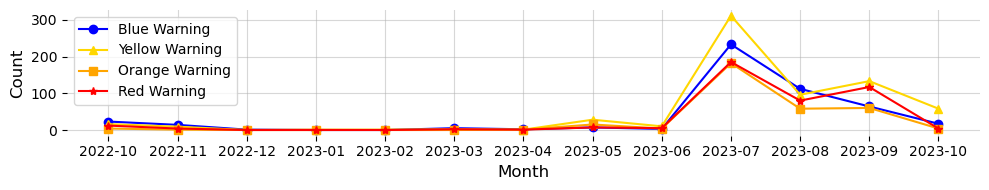

In [56]:
show_lines(get_warning_dist_month())

In [60]:
len(list(set(typhoon_news['city_name'].tolist())))

237